# Ray-Triangle Intersection
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [ray-intersection_triangle.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Graphics/ray-intersection_triangle.ipynb)
---
Implementation of ray-triangle intersection algorithm.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.seterr(divide='ignore', invalid='ignore')
plt.rcParams['figure.figsize'] = (16, 4)

## Primitives
---
The first thing is to define the ray origin $O$ and direction $\large ê$, where the unit vector $\large ê = \frac{\vec{e}}{\parallel \vec{e} \parallel}$.

![image 01](sourceimages/ray-intersection_triangle_01.jpg)

In [3]:
## Ray
O = np.array([0, 0, 0])         # Origin pont
e = np.array([0.1, 0.1, 1])     # Ray direction
e_ = e/np.linalg.norm(e)        # Unit vector (versor) of e => ê

Next step is to define the 3D triangle in counter-clockwise order in relation to the direction of the face.

![image 02](sourceimages/ray-intersection_triangle_02.jpg)

In [4]:
# Triangle 
A = np.array([0 , 1, 1.50])      # Point A
B = np.array([1 , 0, 1.25])      # Point B
C = np.array([-1, 0, 1.00])      # Point C

## Intersection
---
To find the ray intersection, the next step is to define the triangle normal $\hat{n}$, where:

$$ \large
\hat{n} = \frac{\vec{AB} \times \vec{AC}}{\parallel \vec{AB} \times \vec{AC} \parallel}
$$

*p.s.: to calculate ray-triangle intersection it is **not** necessary to normalize the normal vector.*

![image 03](sourceimages/ray-intersection_triangle_03.jpg)

In [5]:
AB = B - A               # Oriented segment A to B
AC = C - A               # Oriented segment A to C
n = np.cross(AB, AC)     # Normal vector
n_ = n/np.linalg.norm(n) # Normalized normal

The *supporting plane* is what the triangle lies on, sharing the same normal vector. Given the plane equation:

$$ \large
ax + by + cz + d = 0
$$

Having the vector normal as $\hat{n} = [a b c]^T$ and $P = [x y z]^T$ as any point on the plane, we can define $d$ as follows:

$$ \large
\hat{n} \cdot P + d = 0 \quad \therefore \quad d = - \hat{n} \cdot P
$$

*p.s.: in this case any known point can be used. Lets use the point $A$ so $P = A$*

![image 04](sourceimages/ray-intersection_triangle_04.jpg)

In [6]:
# Using the point A to find d
d = - np.dot(n_, A)

Before finding the intersection point $P$ on the plane, we must calculate the parameter $t$. We start by looking at the parametric equation of a line segment, which has the same direction of $ê$ and origin from $O$:

$$ \large
P(P_x, P_y, P_z) = O + ê t
$$

where:

$$
\large P_x = O_x + ê_x t \\
\large P_y = O_y + ê_y t \\
\large P_z = O_z + ê_z t
$$

Using this concept on the plane equation, we have:

$$
\large ax + by + cz + d = 0 \\
\large aP_x + bP_y + cP_z + d = 0 \\
\large a(O_x + ê_x t) + b(O_y + ê_y t) + c(O_z + ê_z t) + d = 0 \\
\large aO_x + aê_x t + bO_y + bê_y t + cO_z + cê_z t + d = 0 \\
\large (aê_x + bê_y + cê_z)t + (aO_x + bO_y + cO_z) + d = 0 \\
\large (\hat{n} \cdot \hat{e})t + \hat{n} \cdot O + d = 0 \\
\large t = - \frac{\hat{n} \cdot O + d}{\hat{n} \cdot \hat{e}}
$$

![image 05](sourceimages/ray-intersection_triangle_05.jpg)

In [7]:
# Finding parameter t
t = - (np.dot(n_, O) + d)/np.dot(n_, e_)

# Finding P
P = O + t*e_

To figure out if the plane intersection point is inside or outside the triangle, we basically have to define the vector from each vertices to $P$ and cross it with its oriented edge segment (for each vertex). If the intersection point is outside the triangle, the resulting vector will be in the opposite direction from the normal one.

$$
\large [(B - A) \times (P - A)] \cdot \hat{n} \geq 0 \\
\large [(B - B) \times (P - B)] \cdot \hat{n} \geq 0 \\
\large [(B - C) \times (P - C)] \cdot \hat{n} \geq 0
$$

If all these conditionals are obeyed, we can conclude that the point $P$ is inside the triangle. Otherwise, the point is going to be outiside toward to the edges of the negative values.

![image 06](sourceimages/ray-intersection_triangle_06.jpg)

In [8]:
# Get the resulting vector for each vertex
# following the construction order
Pa = np.dot(np.cross(B - A, P - A), n_)
Pb = np.dot(np.cross(C - B, P - B), n_)
Pc = np.dot(np.cross(A - C, P - C), n_)

if(t < 0):
    # Means that the triangle has the normal in the opposite direction (same
    # direction from the ray) or the triangle is behind the ray origin
    print('Backface intersection!')

elif(Pa < 0 and Pb < 0 and Pc < 0):
    print('Intersection point is outside the triangle')

else:
    print(f'Intersections at {P}')

Intersections at [0.11842105 0.11842105 1.18421053]


## 3D Intersection
---
Apply same model for each pixel of an image plane as the origin and the ray direction is based on the perspective camera model:

![image 07](sourceimages/ray-intersection_triangle_07.jpg)

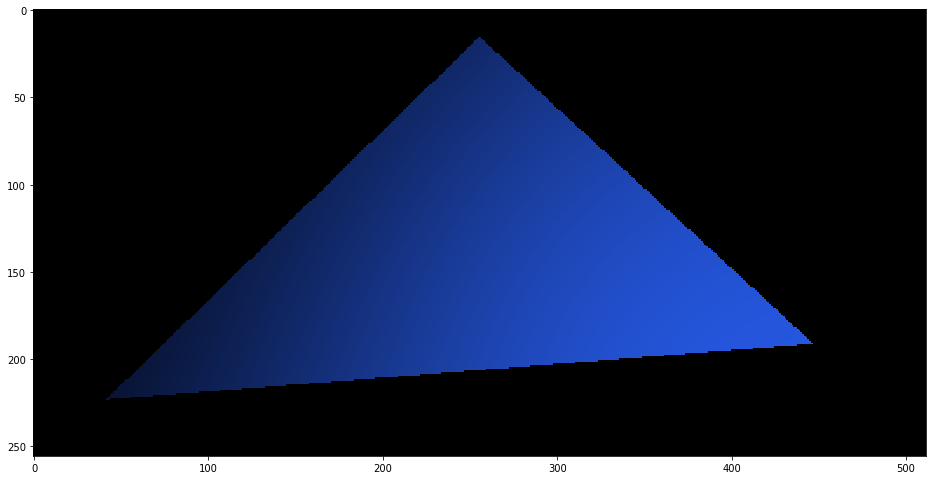

In [9]:
N, M = 256j, 512j
O = np.ones((int(N.imag), int(M.imag), 3))                        # Init image plane origin
O[..., 1], O[..., 0] = np.mgrid[0.5:-0.5:N, 1:-1:M]               # Image plane uvw coordinates
e_ = O/np.linalg.norm(O, axis=2)[:,:,np.newaxis]                  # Normalized ray directon e_

# Triangle 
A = np.array([0   , 2.2 , 5])                                     # Point A
B = np.array([6.7 , -3  , 8])                                     # Point B
C = np.array([-1.5, -0.5, 2])                                     # Point C

AB = B - A                                                        # Oriented segment A to B
AC = C - A                                                        # Oriented segment A to C
n = np.cross(AB, AC)                                              # Normal vector
n_ = n/np.linalg.norm(n)                                          # Normalized normal

# Using the point A to find d
d = - np.dot(n_, A)

# Finding parameter t
vec_dot = np.vectorize(np.dot, signature='(n),(m)->()')           # Vectorize dot product function
t = - (vec_dot(n_, O) + d)/vec_dot(n_, e_)                        # Get t for each pixel

# Finding P
P = O + t[..., np.newaxis]*e_

# Get the resulting vector for each vertex
# following the construction order
Pa = vec_dot(np.cross(B - A, P - A), n_)                          # Resulting vector of A
Pb = vec_dot(np.cross(C - B, P - B), n_)                          # Resulting vector of B
Pc = vec_dot(np.cross(A - C, P - C), n_)                          # Resulting vector of C

output = np.zeros((int(N.imag), int(M.imag), 3))                  # Init output image
cond = np.logical_and(np.logical_and(Pa >= 0, Pb >= 0), Pc >= 0)  # Inside the triangle conditionals
fr = vec_dot(n_, -e_)[..., np.newaxis]                            # Compute the facing ratio
output[cond] = (0.15, 0.35, 0.9)*fr[cond]                         # Shade with color and fr


# Visualization
fig, ax = plt.subplots(figsize=(16, 10))
ax.imshow(output)
plt.show()

## Barycentric coordinates
---
The barycentric coordinates will help us to interpolate in-between vertex values. To do that we have to calculate the area of all resulting triangles. Any triangle area can be calculated as follows:

$$
\large \text{Area}_{ABC} = \frac{\parallel (B - A) \times (C - A) \parallel}{2}
$$

Next step is to find the weight of each point so that we can use it to interpolate any desired values.

$$
\large \alpha = \frac{\text{Area}_{BCP}}{\text{Area}_{ABC}} = \frac{\parallel (C - B) \times (P - B) \parallel}{\parallel (B - A) \times (C - A) \parallel} \\\\
\large \beta = \frac{\text{Area}_{CAP}}{\text{Area}_{ABC}} = \frac{\parallel (A - C) \times (P - C) \parallel}{\parallel (B - A) \times (C - A) \parallel} \\\\
\large \gamma = \frac{\text{Area}_{ABP}}{\text{Area}_{ABC}} = \frac{\parallel (B - A) \times (P - A) \parallel}{\parallel (B - A) \times (C - A) \parallel}
$$

Have the weights we can interpolate any kind of value (color, for example) by using:

$$ \large
V = \frac{\alpha V_A + \beta V_B + \gamma V_C}{\alpha + \beta + \gamma}
$$

![image 08](sourceimages/ray-intersection_triangle_08.jpg)

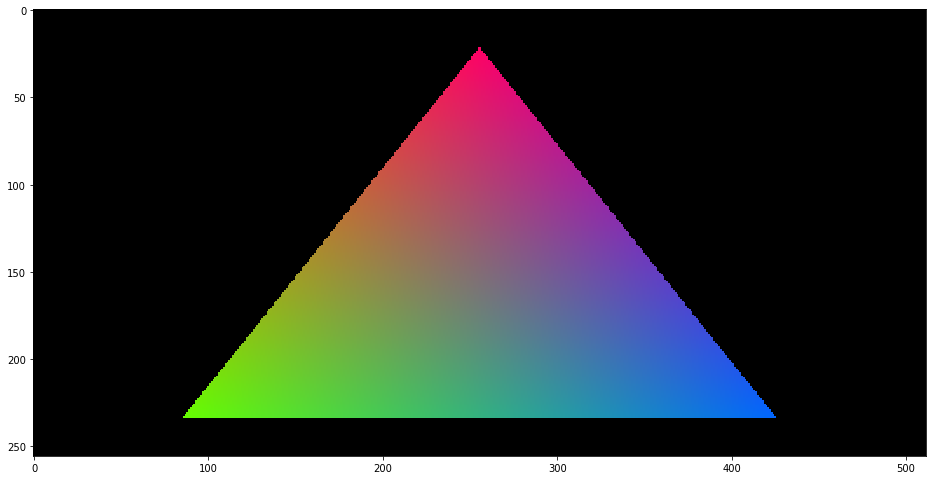

In [10]:
N, M = 256j, 512j
O = np.ones((int(N.imag), int(M.imag), 3))                        # Init image plane origin
O[..., 1], O[..., 0] = np.mgrid[0.5:-0.5:N, 1:-1:M]               # Image plane uvw coordinates
e_ = O/np.linalg.norm(O, axis=2)[..., np.newaxis]                 # Normalized ray directon e_

# Triangle 
A = np.array([0 , 1.25 , 3])                                      # Point A
B = np.array([2 , -1.25, 3])                                      # Point B
C = np.array([-2, -1.25, 3])                                      # Point C

AB = B - A                                                        # Oriented segment A to B
AC = C - A                                                        # Oriented segment A to C
n = np.cross(AB, AC)                                              # Normal vector
n_ = n/np.linalg.norm(n)                                          # Normalized normal

# Using the point A to find d
d = - np.dot(n_, A)

# Finding parameter t
vec_dot = np.vectorize(np.dot, signature='(n),(m)->()')           # Vectorize dot product function
t = - (vec_dot(n_, O) + d)/vec_dot(n_, e_)                        # Get t for each pixel

# Finding P
P = O + t[..., np.newaxis]*e_

# Get the resulting vector for each vertex
# following the construction order
Pa = vec_dot(np.cross(B - A, P - A), n_)                          # Resulting vector of A
Pb = vec_dot(np.cross(C - B, P - B), n_)                          # Resulting vector of B
Pc = vec_dot(np.cross(A - C, P - C), n_)                          # Resulting vector of C

cond = np.logical_and(np.logical_and(Pa >= 0, Pb >= 0), Pc >= 0)  # Inside the triangle conditionals

# Calculate barycentric coordinates
Aa = np.cross(B - A, P - A)                                       # Resulting vector of A and P
Aa = np.linalg.norm(Aa, axis=2)                                   # Area of triangle ABP
Ab = np.cross(C - B, P - B)                                       # Resulting vector of B and P
Ab = np.linalg.norm(Ab, axis=2)                                   # Area of triangle BCP
Ac = np.cross(A - C, P - C)                                       # Resulting vector of C and P
Ac = np.linalg.norm(Ac, axis=2)                                   # Area of triangle CAP
At = np.cross(C - A, B - A)                                       # Resulting vector of triangle
At = np.linalg.norm(At)                                           # Area of triangle ABC

# Getting the barycenter weights
alpha = (Ab/At)[..., np.newaxis]
beta = (Ac/At)[..., np.newaxis]
gamma = (Aa/At)[..., np.newaxis]

# Output image
output = np.zeros((int(N.imag), int(M.imag), 3))                  # Init output image
Ca = np.array([1, 0, 0.4])                                        # Color vertex A
Cb = np.array([0.4, 1, 0])                                        # Color vertex B
Cc = np.array([0, 0.4, 1])                                        # Color vertex C
Cd = (alpha*Ca + beta*Cb + gamma*Cc)/(alpha + beta + gamma)       # Interpolated color based on barycentric coordinates

output[cond] = Cd[cond]                                           # Shade with the interpolated colors


# Visualization
fig, ax = plt.subplots(figsize=(16, 10))
ax.imshow(output)
plt.show()